In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
import numpy as np
from LinearMPC_3_2.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [ ]:
Ts = 0.05
sim_time = 7
H = 5.0
x0 = [0,0,0,0,0,0,0,0,0,0,0,0]   # initial state
x_target = np.zeros(12)
x_target[6] = 3.0                 # vx = 3 m/s
x_target[7] = 3.0                 # vy = 3 m/s
x_target[8] = 3.0                 # vz = 3 m/s
x_target[5] = np.deg2rad(35)      # gamma = 35° (in rad)

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, x_target=x_target, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 0.1
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=x_target.reshape(-1, 1).repeat(u_cl.shape[1], axis=1),
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', interval=500, max=139), IntSlider(v…

{'fig': <Figure size 640x480 with 16 Axes>,
 'axes': [<Axes: ylabel='inputs'>,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Y'}>,
  <Axes: title={'center': 'Subsystem X'}, ylabel='$\\omega_{\\alpha\\beta\\gamma}$ (deg/s)'>,
  <Axes: title={'center': 'Subsystem Roll'}>,
  <Axes: >,
  <Axes: ylabel='$\\alpha\\beta\\gamma$ (deg)'>,
  <Axes: >,
  <Axes: ylabel='$v$ (m/s)'>,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Z'}>,
  <Axes: ylabel='$\\text{pos}$ (m)'>,
  <Axes: >,
  <Axes: >],
 'plotter': <pyvista.plotting.plotter.Plotter at 0x29e020470>,
 'scene_objects': {'rocket_actor': Actor (0x29dd2b640)
    Center:                     (0.32006999999999997, -0.0015085000000000237, 0.5884844999999999)
    Pickable:                   True
    Position:                   (0.0, 0.0, 0.0)
    Scale:                      (1.0, 1.0, 1.0)
    Visible:                    True
    X Bounds                    -6.402E-01, 1.280E+00
    Y Bounds                    -1.212E+0

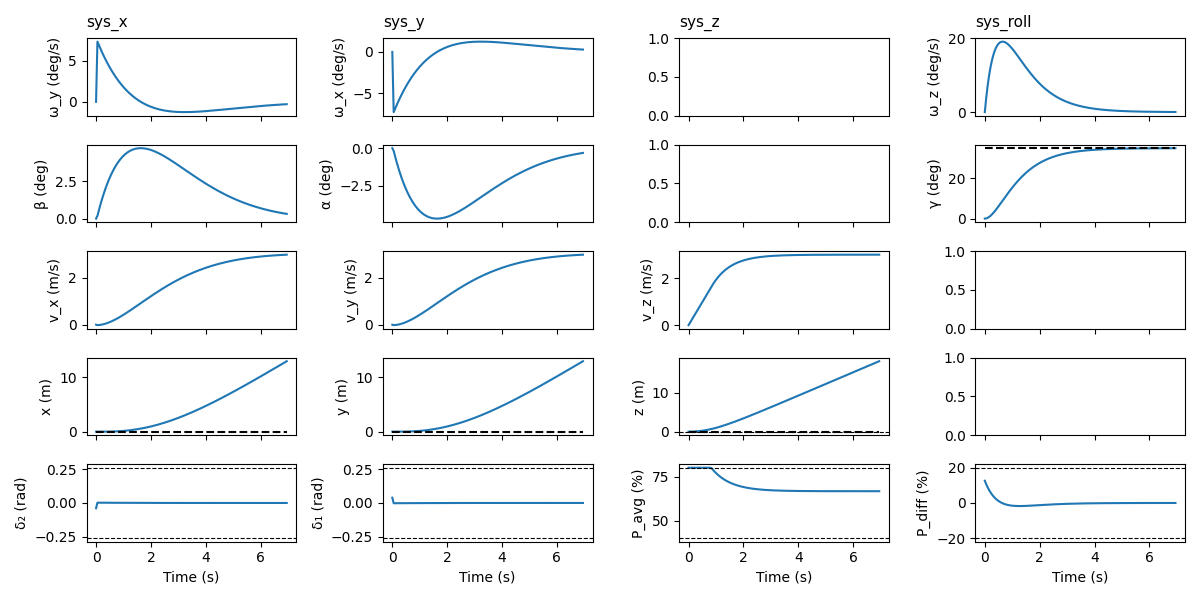

In [9]:
from src.vel_rocket_vis import plot_static_states_inputs

plot_static_states_inputs(t_cl[:-1], x_cl[:, :-1], u_cl, x_target)



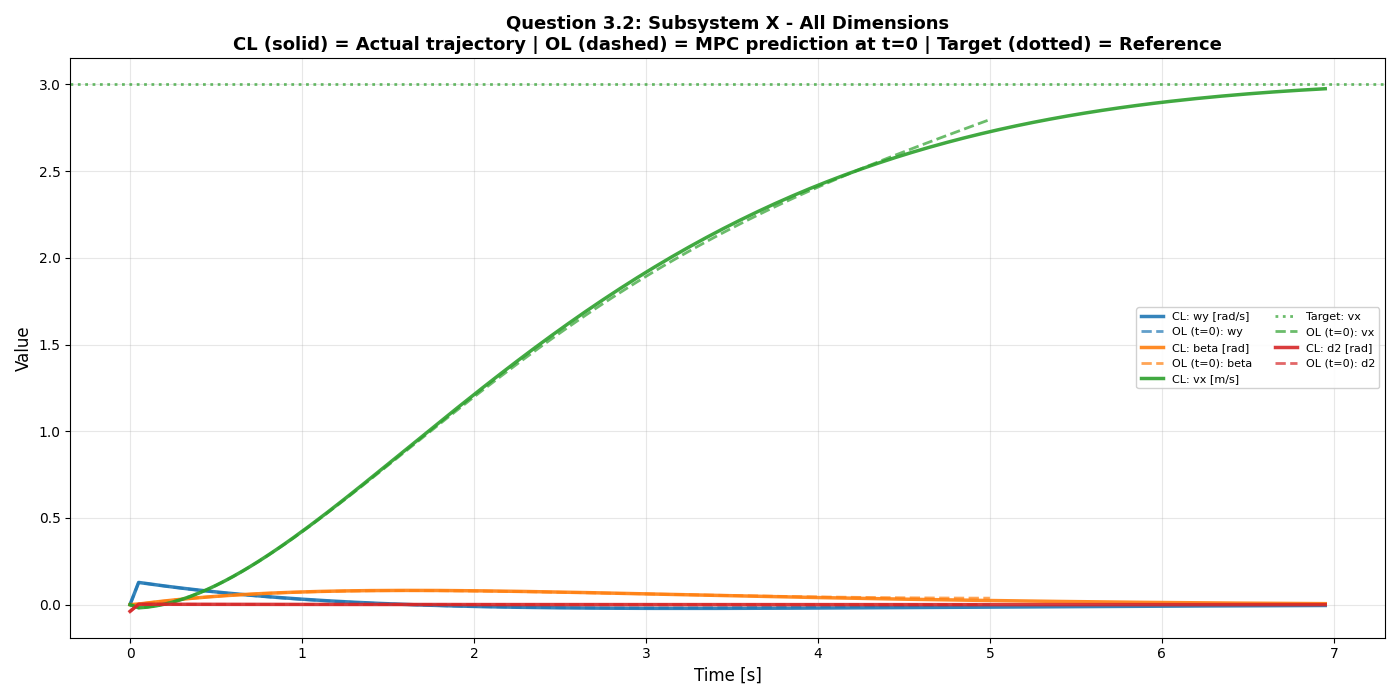

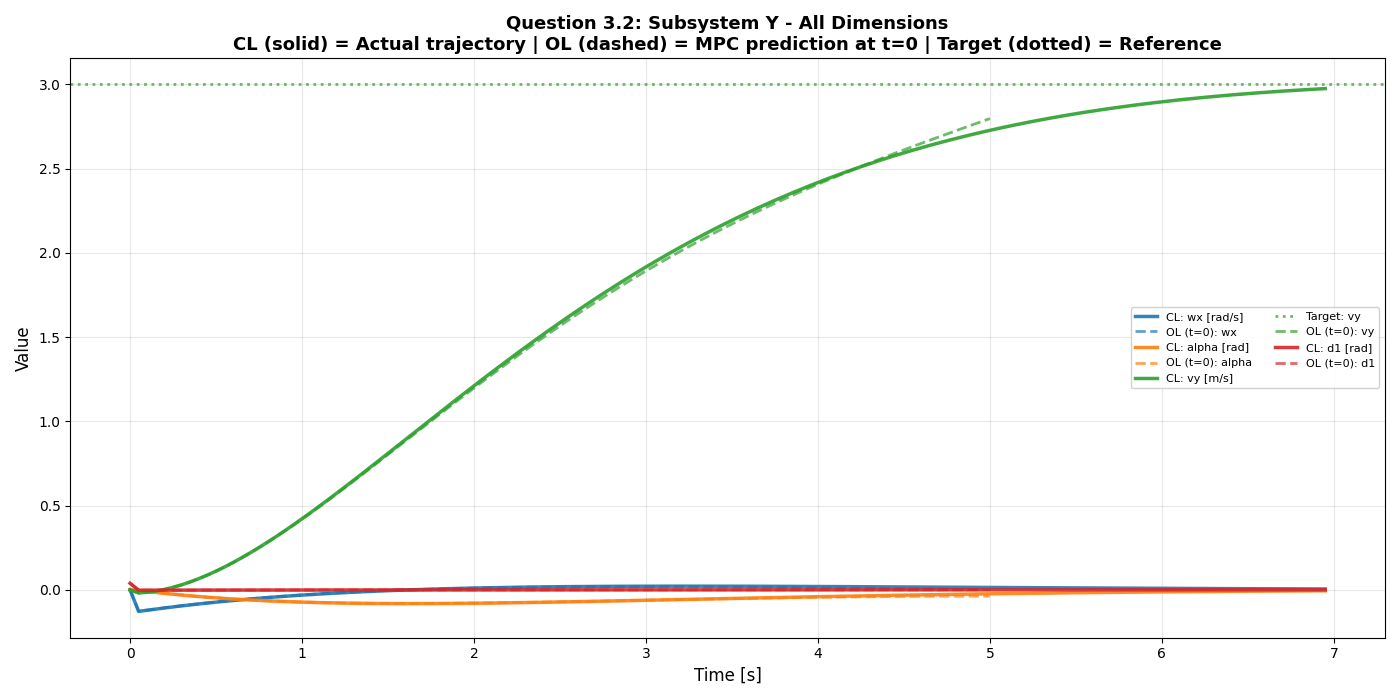

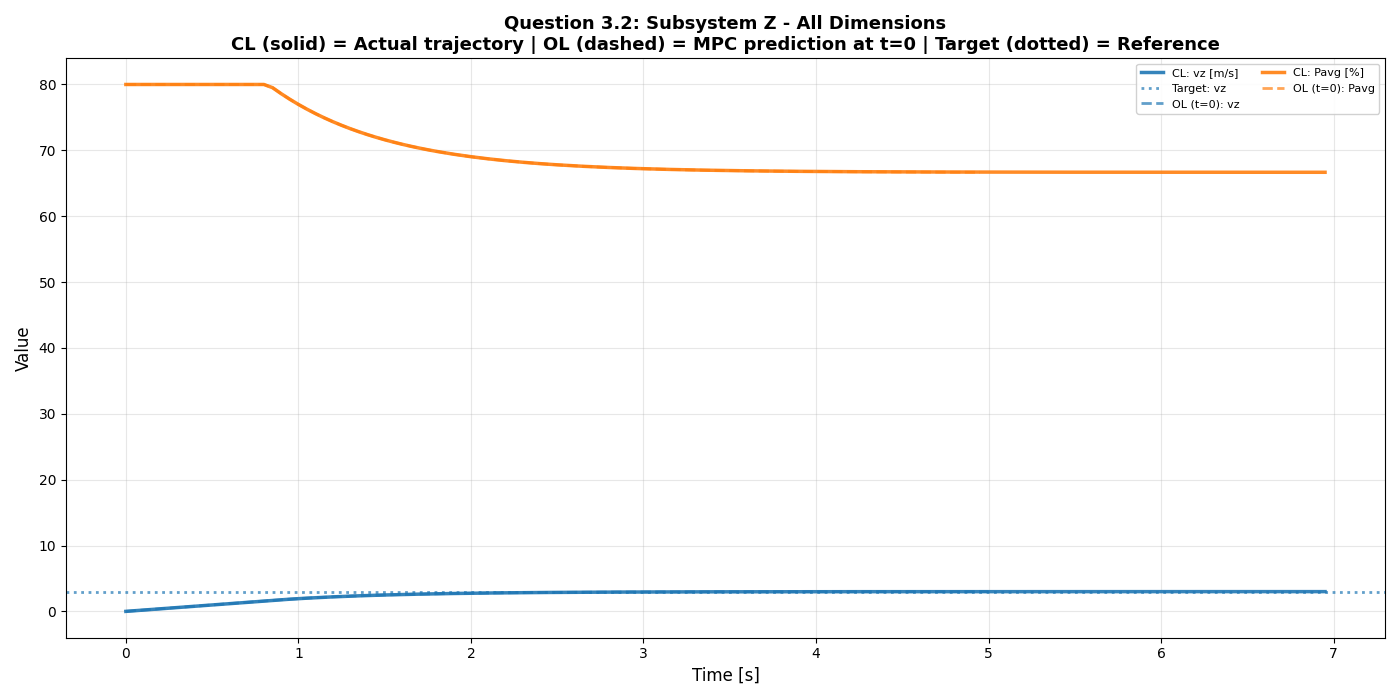

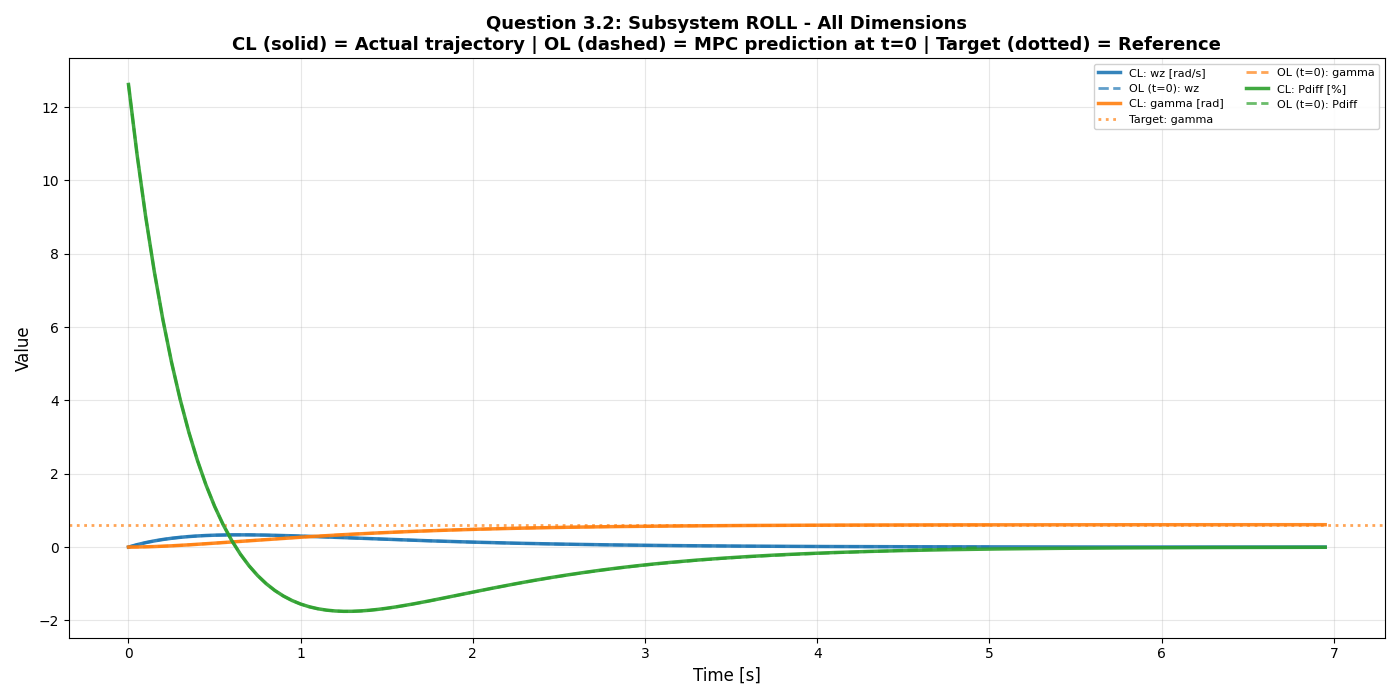

In [4]:
# Question 3.2: Plot Open Loop (OL) vs Closed Loop (CL) trajectories for each subsystem
# All dimensions (states + input) on the same plot for each subsystem

import matplotlib.pyplot as plt

subsystems_info = [
    {
        'name': 'x',
        'state_indices': [1, 4, 6],  # wy, beta, vx
        'state_names': ['wy', 'beta', 'vx'],
        'state_units': ['rad/s', 'rad', 'm/s'],
        'input_index': 1,  # d2
        'input_name': 'd2',
        'input_unit': 'rad'
    },
    {
        'name': 'y',
        'state_indices': [0, 3, 7],  # wx, alpha, vy
        'state_names': ['wx', 'alpha', 'vy'],
        'state_units': ['rad/s', 'rad', 'm/s'],
        'input_index': 0,  # d1
        'input_name': 'd1',
        'input_unit': 'rad'
    },
    {
        'name': 'z',
        'state_indices': [8],  # vz
        'state_names': ['vz'],
        'state_units': ['m/s'],
        'input_index': 2,  # Pavg
        'input_name': 'Pavg',
        'input_unit': '%'
    },
    {
        'name': 'roll',
        'state_indices': [2, 5],  # wz, gamma
        'state_names': ['wz', 'gamma'],
        'state_units': ['rad/s', 'rad'],
        'input_index': 3,  # Pdiff
        'input_name': 'Pdiff',
        'input_unit': '%'
    }
]

colors_states = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Different colors for each dimension

# Only show OL prediction at t=0
ol_time_index = 0  # Only at initial time

for sub_info in subsystems_info:
    fig, ax = plt.subplots(1, 1, figsize=(14, 7))
    
    # Plot all states on the same axes
    for idx, (state_idx, state_name, state_unit) in enumerate(zip(sub_info['state_indices'], 
                                                                    sub_info['state_names'], 
                                                                    sub_info['state_units'])):
        color = colors_states[idx % len(colors_states)]
        
        # Closed loop trajectory (actual trajectory) - goes for full sim_time
        ax.plot(t_cl[:-1], x_cl[state_idx, :-1], color=color, linestyle='-', 
               linewidth=2.5, label=f'CL: {state_name} [{state_unit}]', alpha=0.9)
        
        # Plot target/reference if available
        if x_target is not None and x_target[state_idx] != 0:
            ax.axhline(y=x_target[state_idx], color=color, linestyle=':', 
                      linewidth=2, label=f'Target: {state_name}', alpha=0.7)
        
        # Open loop trajectory at t=0 only (MPC prediction from initial time)
        if t_ol.ndim == 2 and x_ol.ndim == 3:
            k = ol_time_index
            if k < t_ol.shape[1] and k < x_ol.shape[2]:
                ax.plot(t_ol[:, k], x_ol[state_idx, :, k], color=color, linestyle='--', 
                       linewidth=2, label=f'OL (t=0): {state_name}', alpha=0.7)
    
    # Plot input on the same axes
    input_idx = sub_info['input_index']
    input_color = colors_states[len(sub_info['state_indices']) % len(colors_states)]
    
    # Closed loop trajectory for input (actual input applied) - goes for full sim_time
    ax.plot(t_cl[:-1], u_cl[input_idx, :], color=input_color, linestyle='-', 
           linewidth=2.5, label=f'CL: {sub_info["input_name"]} [{sub_info["input_unit"]}]', alpha=0.9)
    
    # Open loop trajectory for input at t=0 only (predicted input from initial time)
    if t_ol.ndim == 2 and u_ol.ndim == 3:
        k = ol_time_index
        if k < t_ol.shape[1] and k < u_ol.shape[2]:
            t_ol_input = t_ol[:u_ol.shape[1], k]
            ax.plot(t_ol_input, u_ol[input_idx, :, k], color=input_color, linestyle='--', 
                   linewidth=2, label=f'OL (t=0): {sub_info["input_name"]}', alpha=0.7)
    
    ax.set_xlabel('Time [s]', fontsize=12)
    ax.set_ylabel('Value', fontsize=12)
    ax.set_title(f'Question 3.2: Subsystem {sub_info["name"].upper()} - All Dimensions\n'
                 f'CL (solid) = Actual trajectory | OL (dashed) = MPC prediction at t=0 | Target (dotted) = Reference',
                 fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best', fontsize=8, ncol=2, framealpha=0.9)
    
    plt.tight_layout()
    plt.show()
